In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df1_house = pd.read_csv('C:\\Users\\riyan\\House_Pricing_Assignment\\train.csv')

In [3]:
print(df1_house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Drop Columns which have large number of NULL values and save the updated CSV file
print(len(df1_house))
limitPer = len(df1_house) * .60
print(limitPer)
df2_house = df1_house.dropna(thresh=limitPer, axis=1)
print(df2_house.shape)
df2_house.to_csv('C:\\Users\\riyan\\House_Pricing_Assignment\\df2_train.csv', index=False)

1460
876.0
(1460, 76)


In [5]:
print(df2_house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
#Drop Columns which have same value in each row and save to updated csv 
print(df2_house.columns[df2_house.nunique() <= 1])
df3_house=df2_house.drop(columns=df2_house.columns[df2_house.nunique() <= 1], axis=1)
print(df3_house.shape)
df3_house.to_csv('C:\\Users\\riyan\\House_Pricing_Assignment\\df3_train.csv', index=False)
print(df3_house.shape)
print(df3_house.info())

Index([], dtype='object')
(1460, 76)
(1460, 76)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  Over

In [7]:
# Check if any value in the DataFrame can be converted to numeric
are_numeric = df3_house.applymap(lambda x: pd.to_numeric(x, errors='coerce')).notna().all()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the result
print(pd.concat([are_numeric, df3_house.dtypes.astype(str)], axis=1))




                   0        1
Id              True    int64
MSSubClass      True    int64
MSZoning       False   object
LotFrontage    False  float64
LotArea         True    int64
Street         False   object
LotShape       False   object
LandContour    False   object
Utilities      False   object
LotConfig      False   object
LandSlope      False   object
Neighborhood   False   object
Condition1     False   object
Condition2     False   object
BldgType       False   object
HouseStyle     False   object
OverallQual     True    int64
OverallCond     True    int64
YearBuilt       True    int64
YearRemodAdd    True    int64
RoofStyle      False   object
RoofMatl       False   object
Exterior1st    False   object
Exterior2nd    False   object
MasVnrType     False   object
MasVnrArea     False  float64
ExterQual      False   object
ExterCond      False   object
Foundation     False   object
BsmtQual       False   object
BsmtCond       False   object
BsmtExposure   False   object
BsmtFinTyp

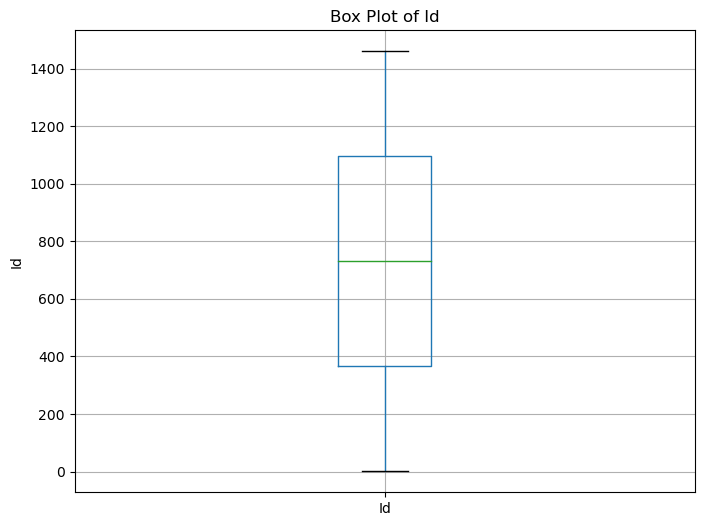

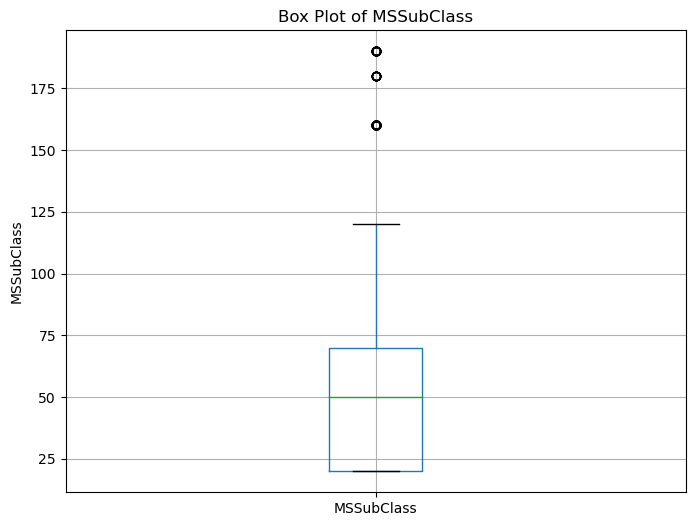

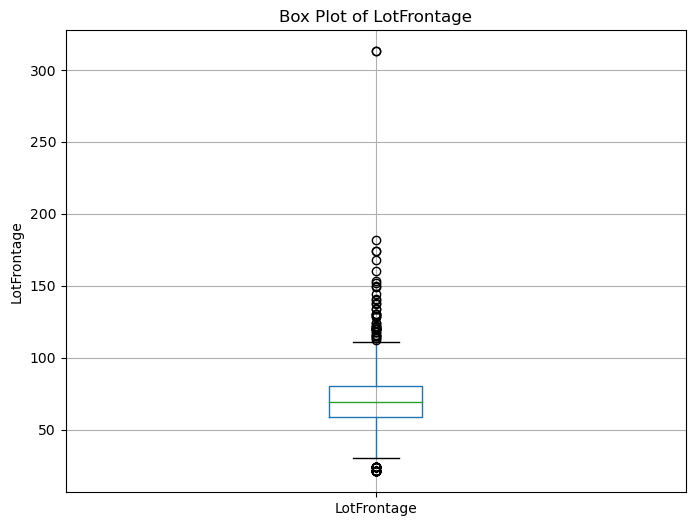

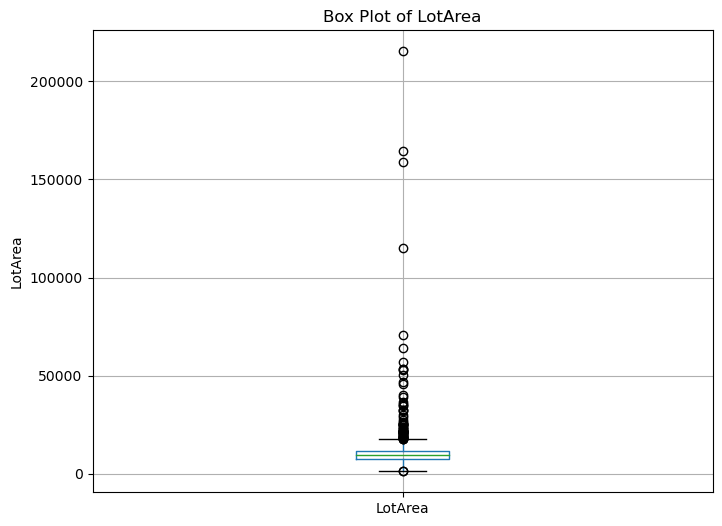

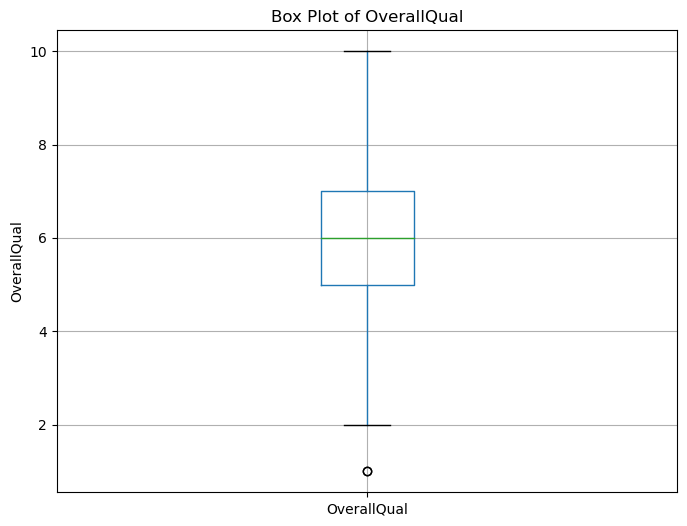

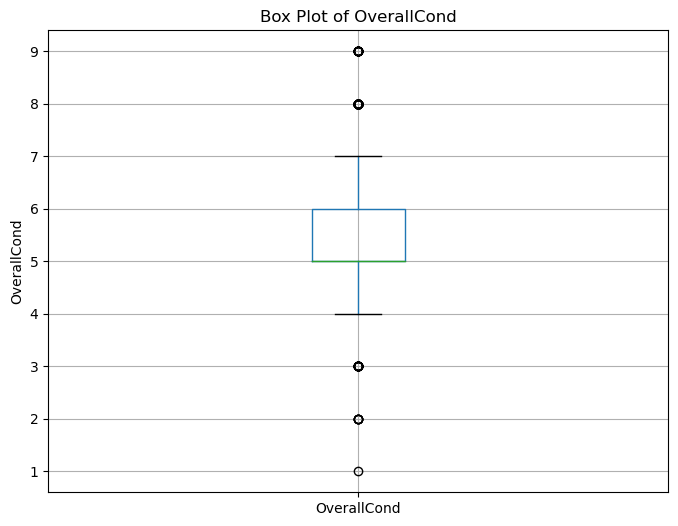

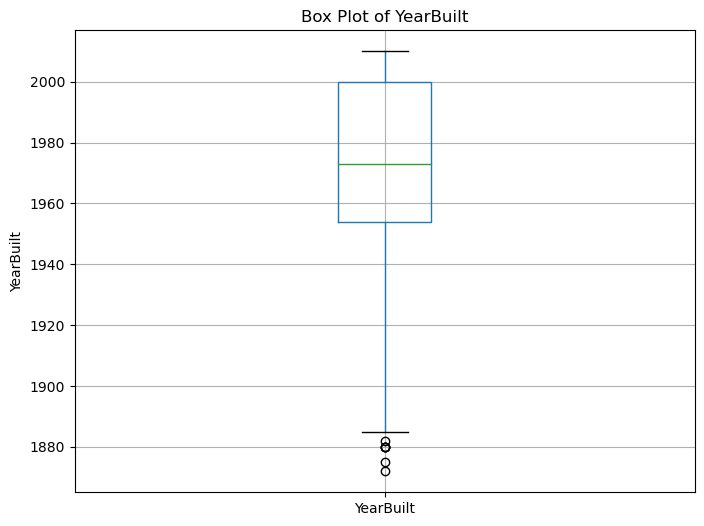

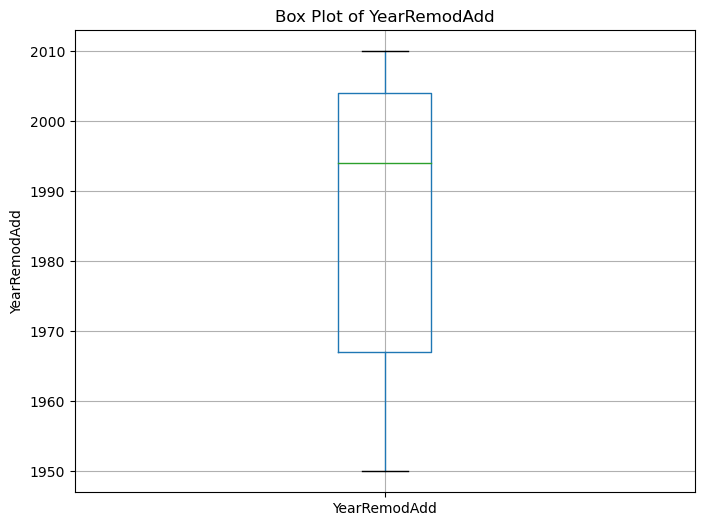

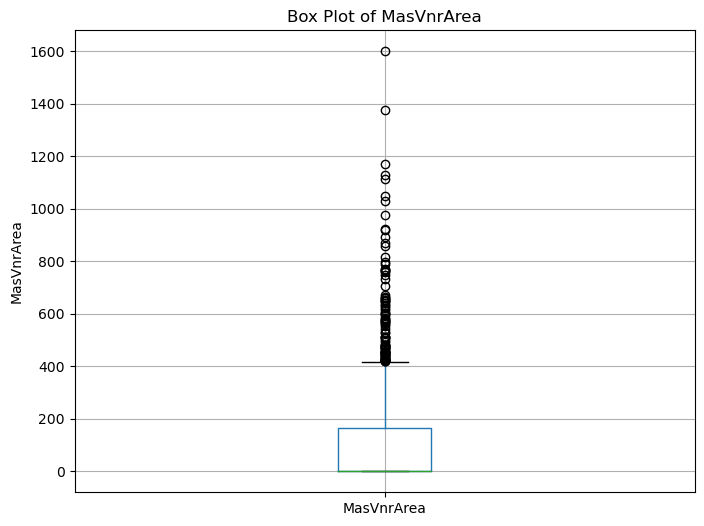

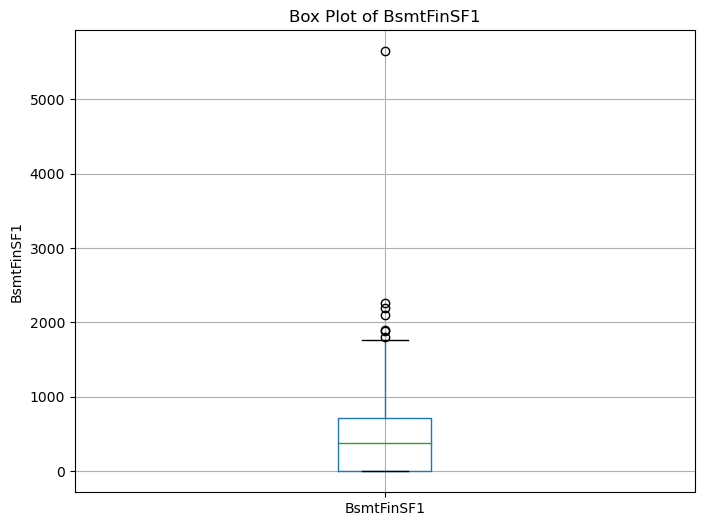

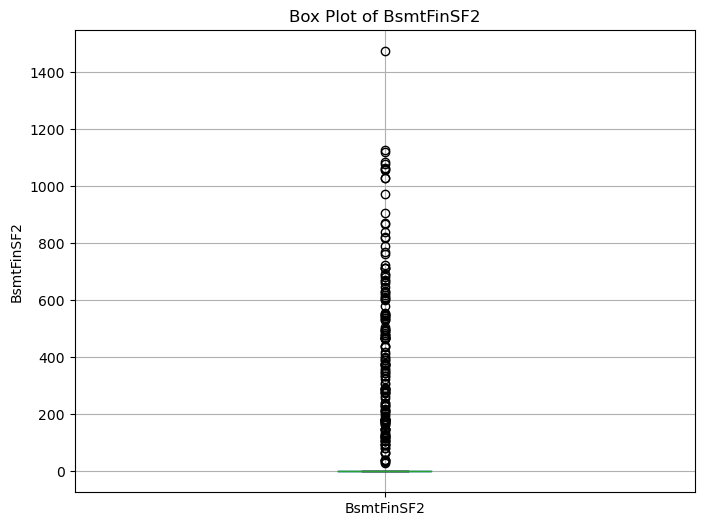

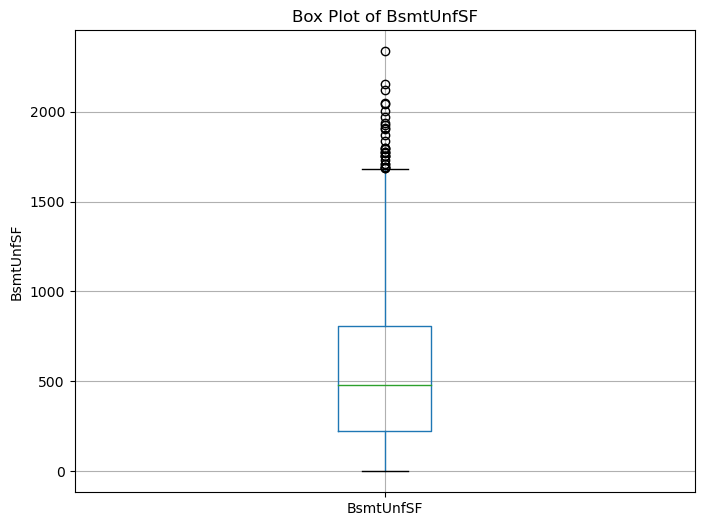

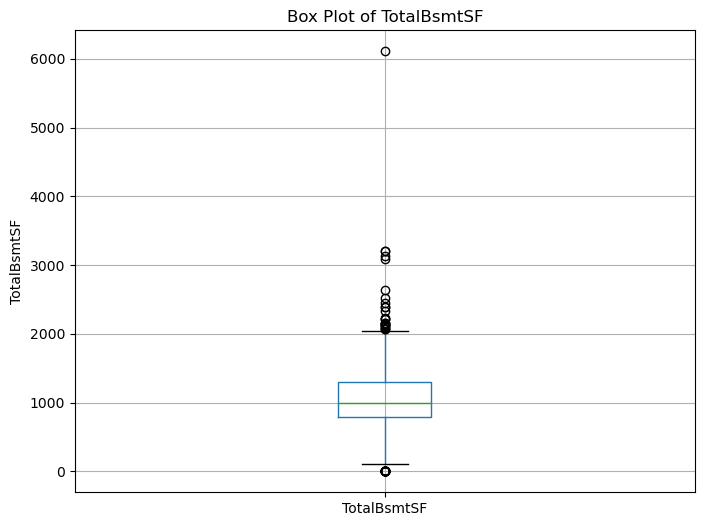

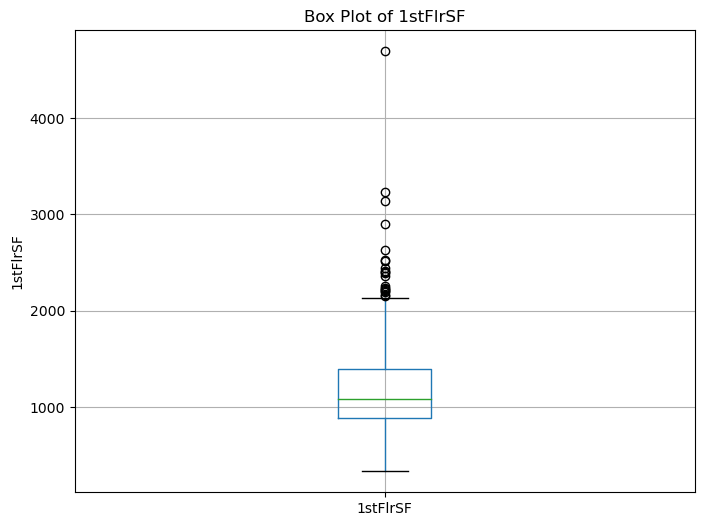

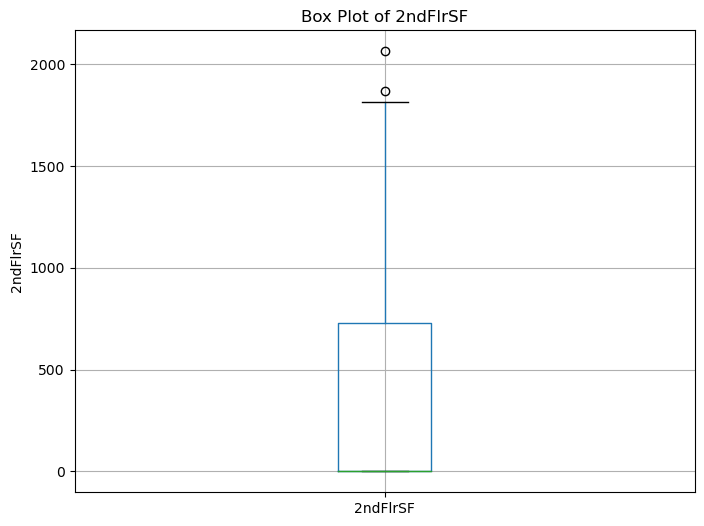

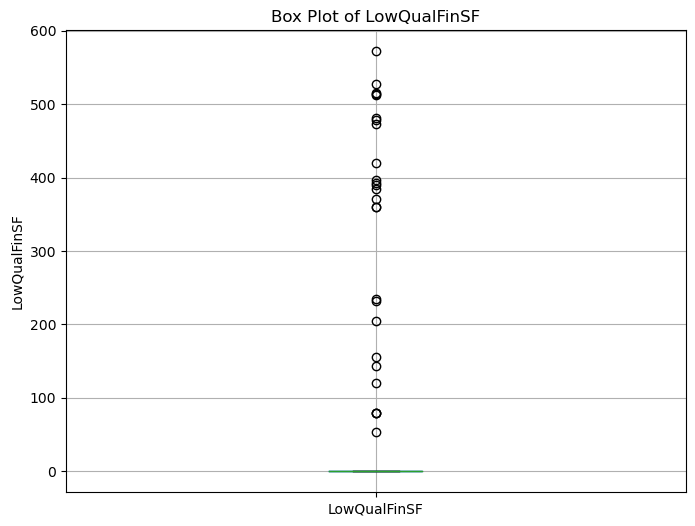

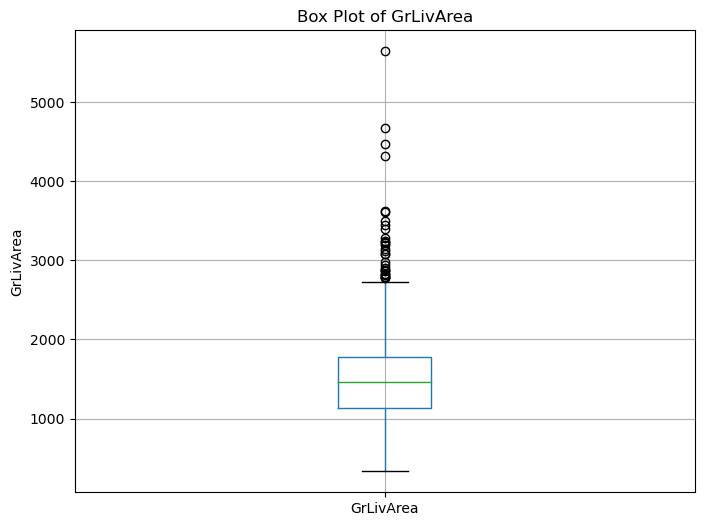

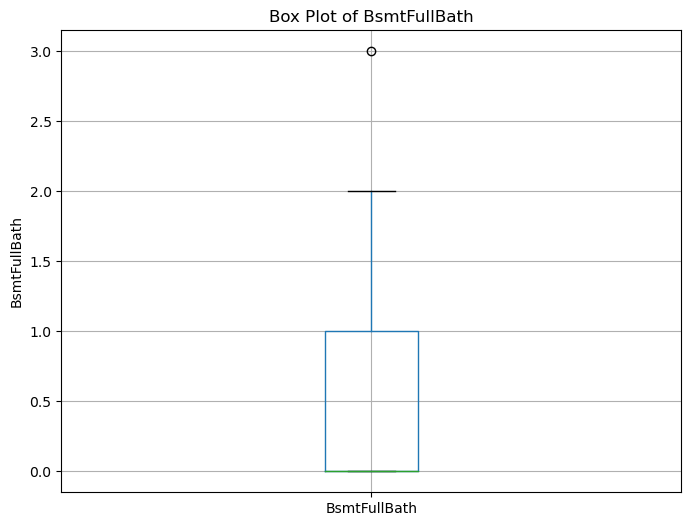

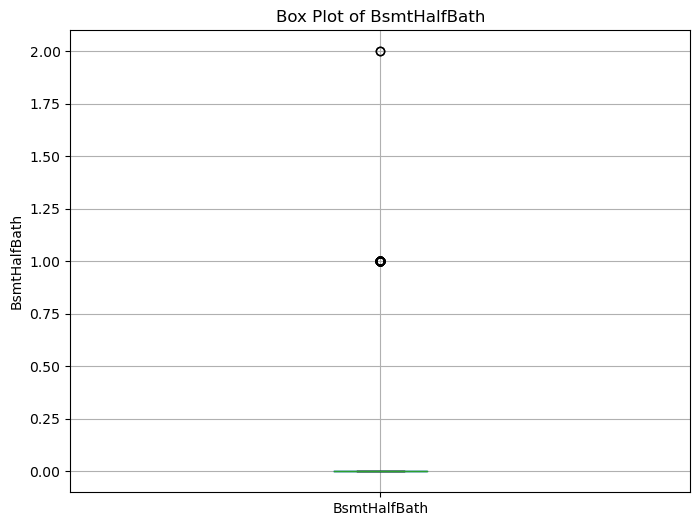

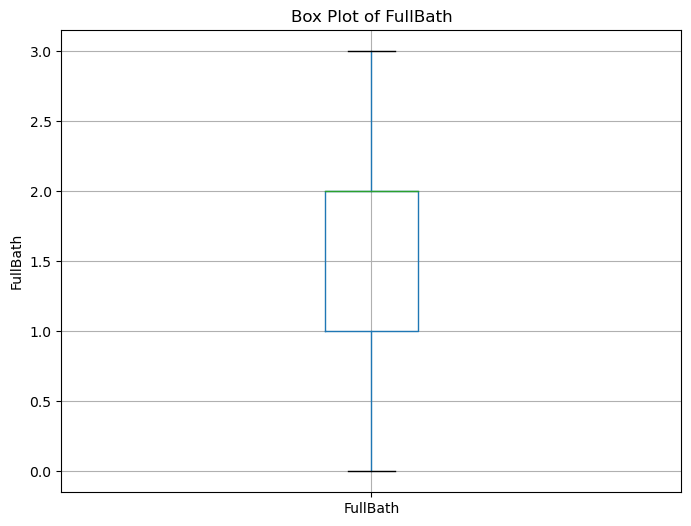

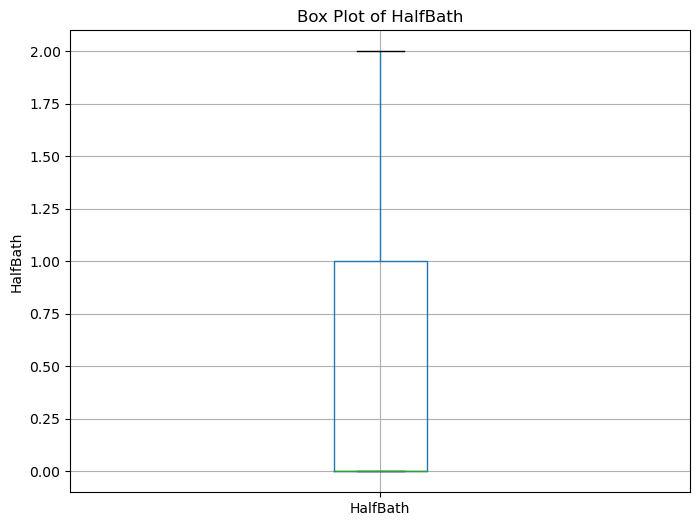

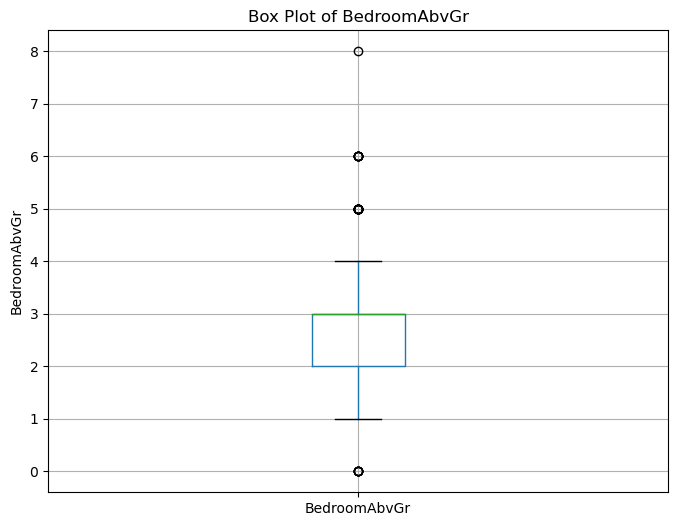

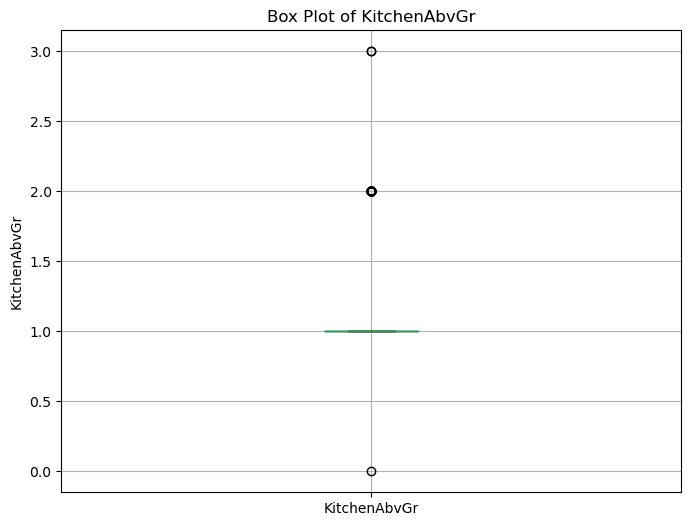

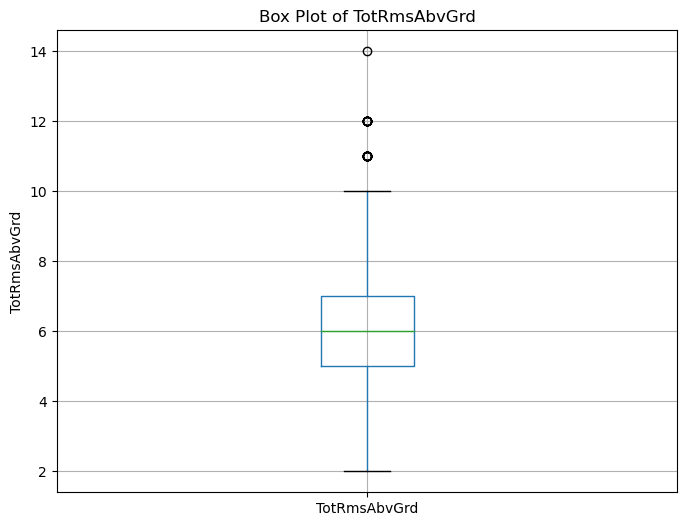

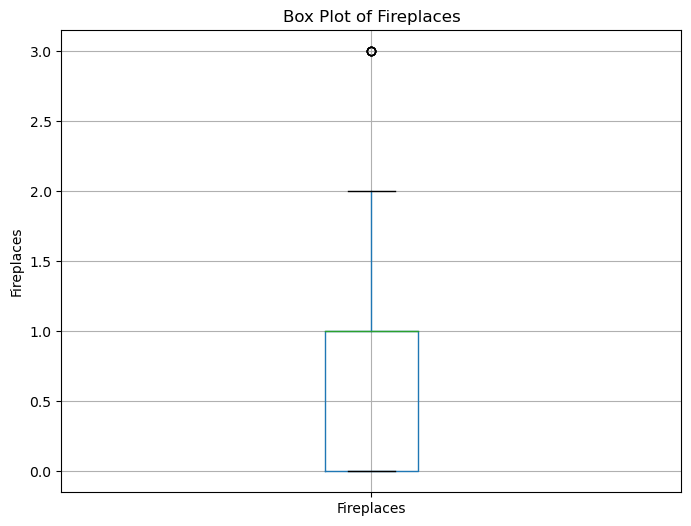

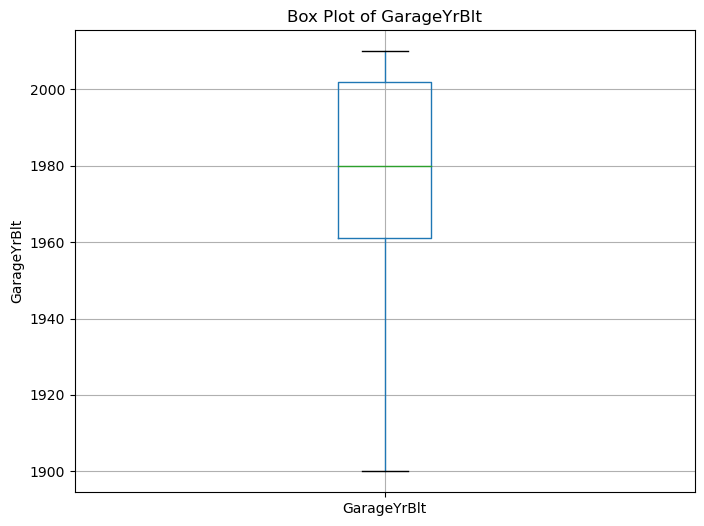

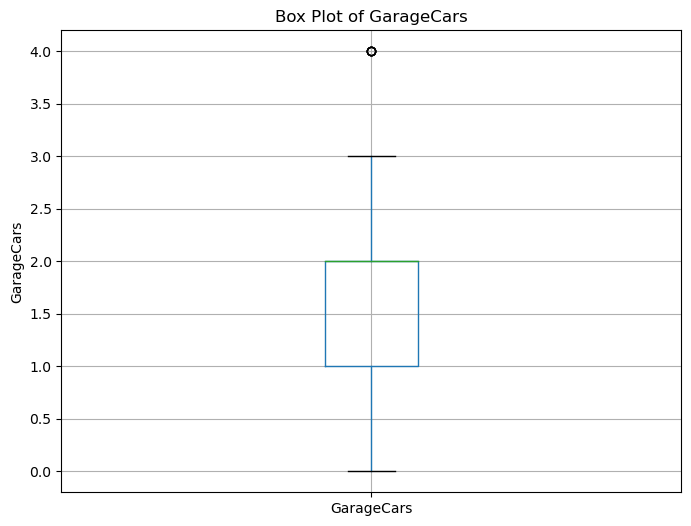

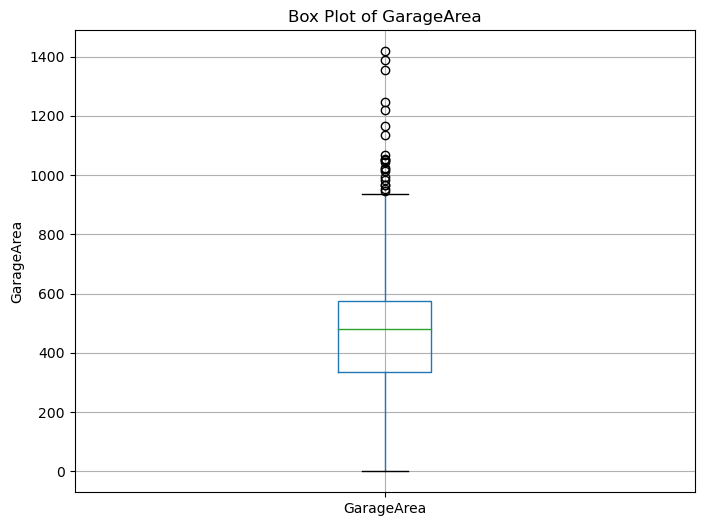

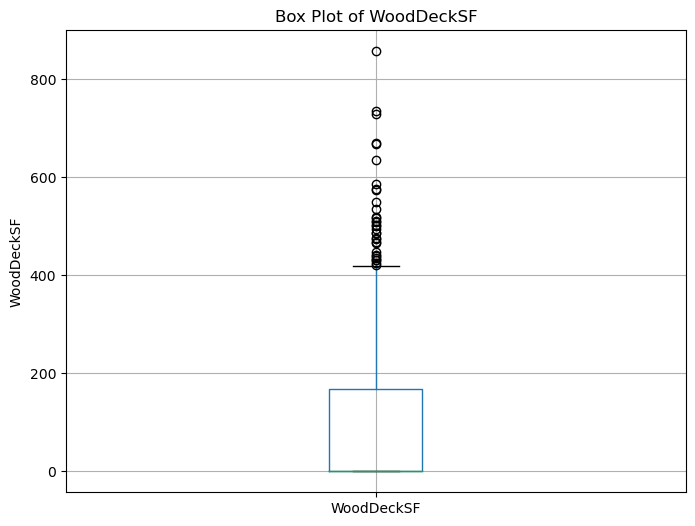

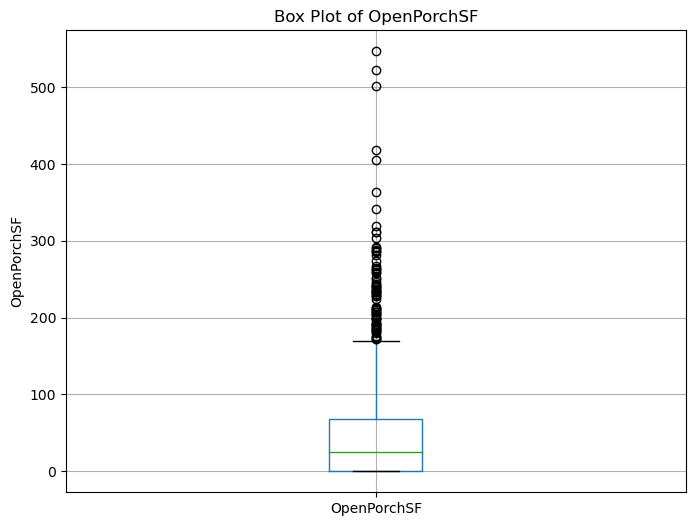

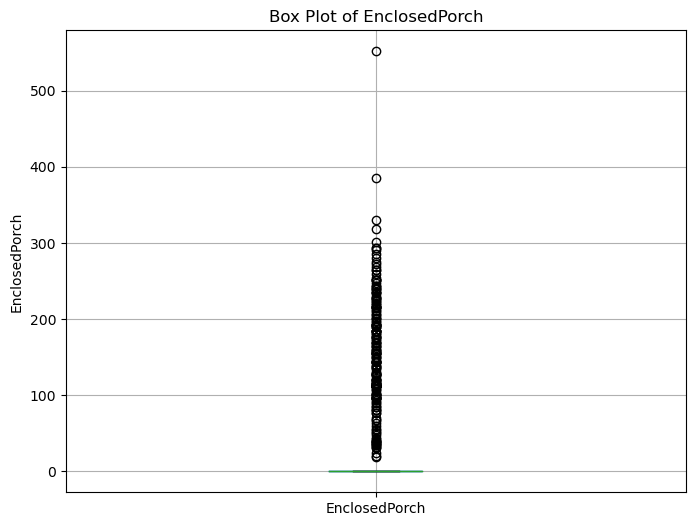

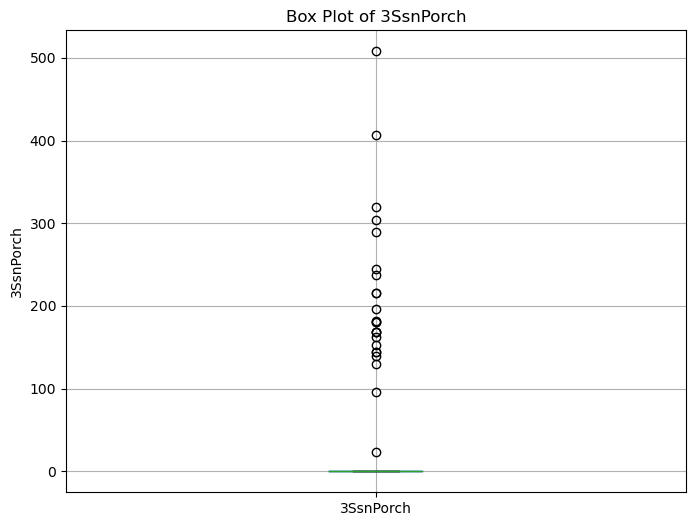

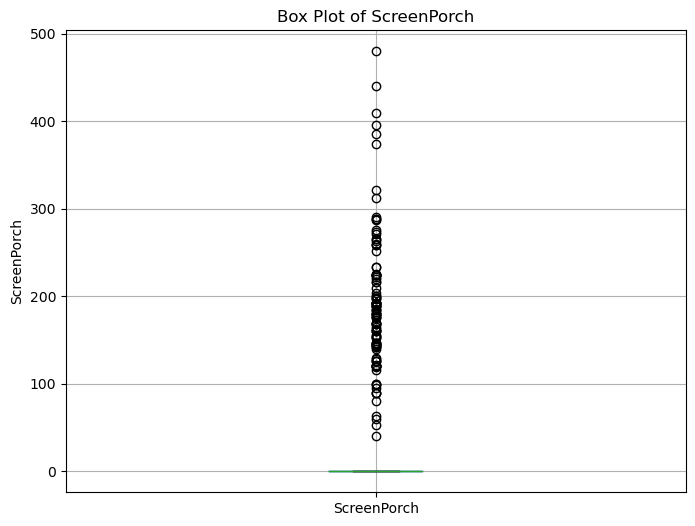

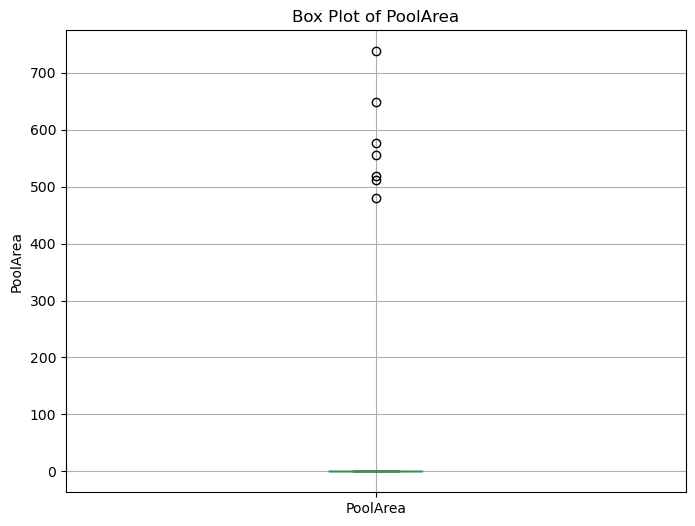

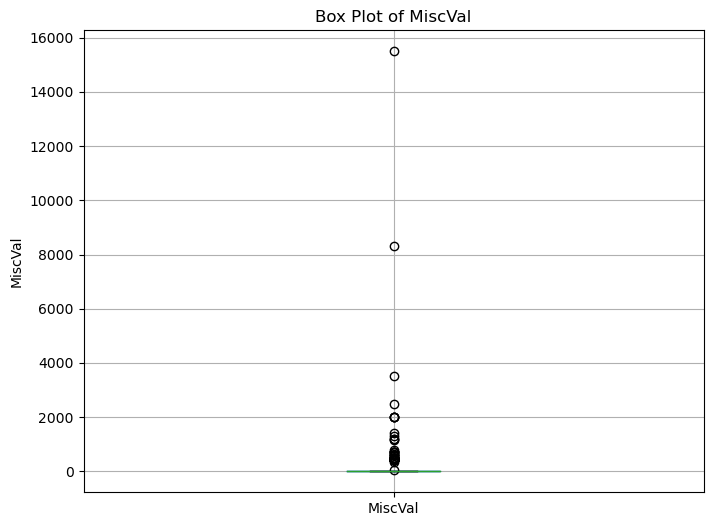

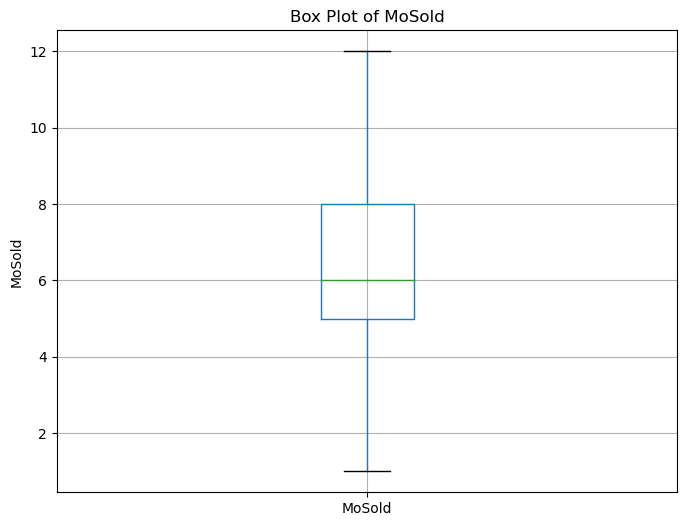

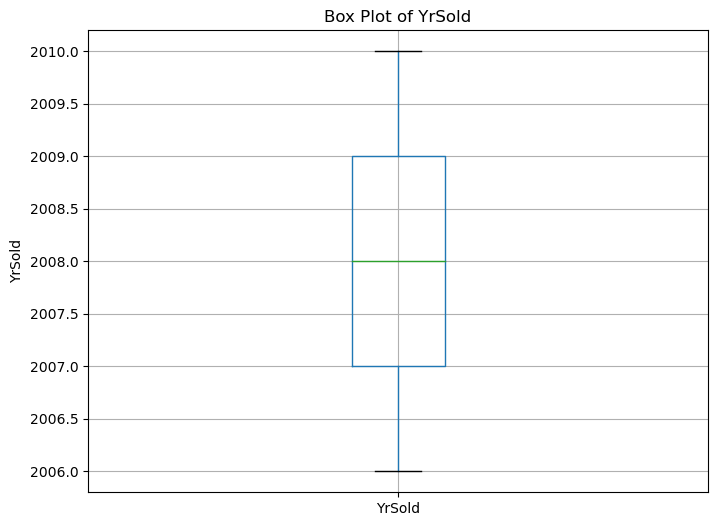

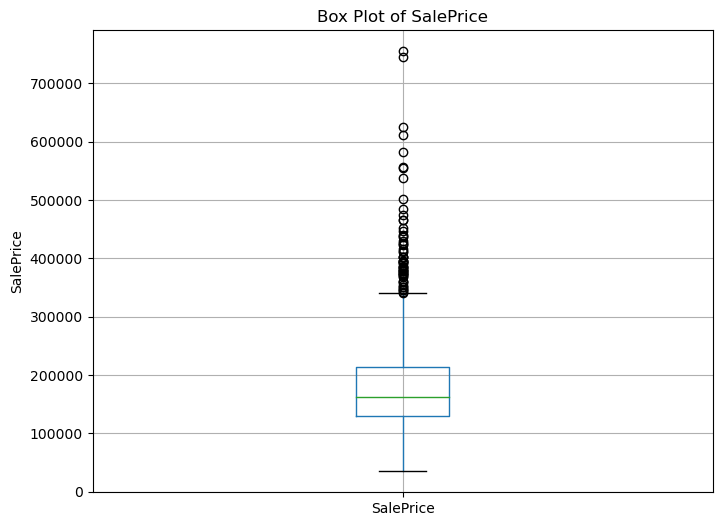

In [8]:
# There is no row in the above output  which has value as True , object . 
# Therefore , there is no need to perform format conversion.

# Find outliers using box plot if there are any for all the numeric columns 
numeric_columns = df3_house.select_dtypes(include='number')
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    df3_house.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show() 


In [9]:
# Calculate median, mean, mode and other stats for each column
summary_stats = pd.DataFrame({
    'Column': df3_house.columns,
    'DataType': df3_house.dtypes,
    'CountNonNull': df3_house.count(),  # Count of non-null values
    'Median': df3_house.median(),
    'Mean': df3_house.mean(),
    'Mode': df3_house.mode().iloc[0]  # Mode returns a DataFrame, so take the first row
})
# Print the tabular summary without the index
print(summary_stats.to_string(index=False))


       Column DataType  CountNonNull   Median          Mean      Mode
           Id    int64          1460   1087.0   1162.626712     864.0
   MSSubClass    int64          1460      0.0    346.992466       0.0
     MSZoning    int64          1460      0.0      3.409589       0.0
  LotFrontage    int64          1460      3.0      2.866438       3.0
      LotArea   object          1460      NaN           NaN      1Fam
       Street   object          1423      NaN           NaN        TA
     LotShape   object          1422      NaN           NaN        No
  LandContour    int64          1460    383.5    443.639726       0.0
    Utilities    int64          1460      0.0     46.549315       0.0
    LotConfig   object          1423      NaN           NaN       Unf
    LandSlope   object          1422      NaN           NaN       Unf
 Neighborhood    int64          1460      0.0      0.425342       0.0
   Condition1    int64          1460      0.0      0.057534       0.0
   Condition2   obje

In [10]:
# Fill null values with mode for each column
for column in df3_house.columns:
    mode_value = df3_house[column].mode().iloc[0]
    df3_house[column].fillna(mode_value, inplace=True)

# Calculate summary statistics for each column
summary_stats = pd.DataFrame({
    'Column': df3_house.columns,
    'DataType': df3_house.dtypes,
    'CountNonNull': df3_house.count(),
    'Median': df3_house.median(),
    'Mean': df3_house.mean(),
    'Mode': df3_house.mode().iloc[0]  # Mode returns a DataFrame, so take the first row
})

# Print the tabular summary without the index
print(summary_stats.to_string(index=False))

       Column DataType  CountNonNull   Median          Mean      Mode
           Id    int64          1460   1087.0   1162.626712     864.0
   MSSubClass    int64          1460      0.0    346.992466       0.0
     MSZoning    int64          1460      0.0      3.409589       0.0
  LotFrontage    int64          1460      3.0      2.866438       3.0
      LotArea   object          1460      NaN           NaN      1Fam
       Street   object          1460      NaN           NaN        TA
     LotShape   object          1460      NaN           NaN        No
  LandContour    int64          1460    383.5    443.639726       0.0
    Utilities    int64          1460      0.0     46.549315       0.0
    LotConfig   object          1460      NaN           NaN       Unf
    LandSlope   object          1460      NaN           NaN       Unf
 Neighborhood    int64          1460      0.0      0.425342       0.0
   Condition1    int64          1460      0.0      0.057534       0.0
   Condition2   obje

In [11]:
#Drop Column ID 
df3_house=df3_house.drop(columns=['Id'],axis=1)
#Save updated df3_house dataframe to df4_train.csv
df3_house.to_csv('C:\\Users\\riyan\\House_Pricing_Assignment\\df4_train.csv', index=False)

In [12]:
#Reread the dataset after data preparation is completed . 
df4_house = pd.read_csv('C:\\Users\\riyan\\House_Pricing_Assignment\\df4_train.csv')
print(df4_house.shape)
print(df4_house.info())

(1460, 75)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 1

In [13]:
# Print the number of unique values in each column
for column in df4_house.columns:
    unique_values = df4_house[column].nunique()
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in MSSubClass: 15
Number of unique values in MSZoning: 5
Number of unique values in LotFrontage: 110
Number of unique values in LotArea: 1073
Number of unique values in Street: 2
Number of unique values in LotShape: 4
Number of unique values in LandContour: 4
Number of unique values in Utilities: 2
Number of unique values in LotConfig: 5
Number of unique values in LandSlope: 3
Number of unique values in Neighborhood: 25
Number of unique values in Condition1: 9
Number of unique values in Condition2: 8
Number of unique values in BldgType: 5
Number of unique values in HouseStyle: 8
Number of unique values in OverallQual: 10
Number of unique values in OverallCond: 9
Number of unique values in YearBuilt: 112
Number of unique values in YearRemodAdd: 61
Number of unique values in RoofStyle: 6
Number of unique values in RoofMatl: 8
Number of unique values in Exterior1st: 15
Number of unique values in Exterior2nd: 16
Number of unique values in MasVnrType: 4
Number of uni

<Axes: xlabel='SalePrice', ylabel='Density'>

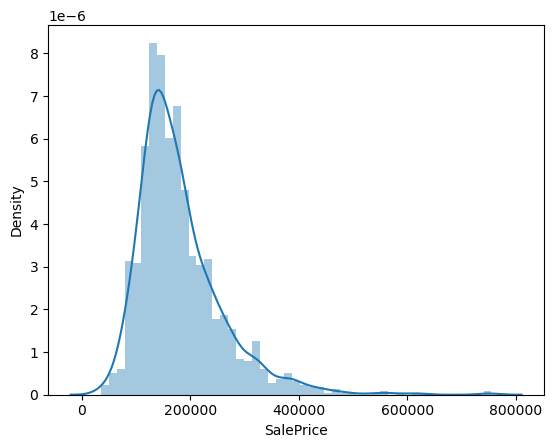

In [37]:
sns.distplot(df4_house["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

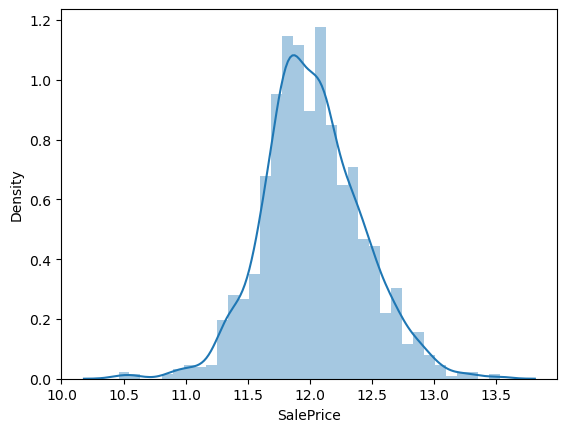

In [38]:
sns.distplot(np.log(df4_house["SalePrice"]))

In [14]:
#Split into X and y
X = df4_house.drop("SalePrice", axis=1)
y = df4_house["SalePrice"]

In [15]:
# creating dummy variables for categorical variables

# subset all categorical variables
df4_house_categorical = X.select_dtypes(include=['object'])
df4_house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [16]:
# convert into dummies - one hot encoding
df4_house_dummies = pd.get_dummies(df4_house_categorical, drop_first=True)
df4_house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0

In [17]:
# drop categorical variables after converting to dummy variables 
X = X.drop(list(df4_house_categorical.columns), axis=1)

In [18]:
# concat dummy variables with X
X = pd.concat([X, df4_house_dummies], axis=1)

In [19]:
print(X.shape)

(1460, 232)


In [20]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=232)

In [21]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [22]:
#Ridge Regression
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [23]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [24]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.78747653e+03  6.09653353e+02  2.78720320e+03  8.75053976e+03
  2.72597284e+03  1.78102978e+03  3.06098777e+03  3.94111769e+03
  2.44836294e+03  6.95323926e+02  8.73107336e+02  3.68051173e+03
  5.58645219e+03  5.08762576e+03 -3.92968301e+02  8.29991003e+03
  2.48896505e+03  1.53224619e+02  3.94559968e+03  1.98921419e+03
  2.17991358e+02 -1.89336194e+03  4.37513485e+03  3.71807538e+03
  1.16219657e+03  4.44117444e+03  3.16576239e+03  1.94530215e+03
  1.06609475e+03 -5.89140016e+00  9.65895173e+02  1.18392538e+03
  9.02600410e+01 -1.53514182e+01 -1.81053660e+02 -4.93146384e+02
  6.50409320e+02  1.56148398e+02  1.28725409e+03 -9.11753650e+02
  8.73101173e+02  3.60134530e+02 -2.26421458e+03 -3.98753269e+02
  1.46375592e+03  4.94466067e+02  1.48766411e+03 -7.82767121e+02
  2.20521178e+03 -1.15036366e+03 -4.67014346e+02 -2.89903517e+02
  6.98871773e+02  5.67418852e+01 -5.01849419e+01 -3.52184035e+02
  1.95809829e+02  2.27271394e+02 -1.24329085e+03  2.96375290e+03
 -2.89316887e+03 -1.47344

In [44]:
# Get the coefficients
coefficients = ridge.coef_
feature_names = X.columns

# Create a dictionary mapping variable names to coefficients
variable_coefficients = dict(zip(feature_names, coefficients))

# Sort the dictionary by coefficients in descending order
sorted_variable_coefficients = dict(sorted(variable_coefficients.items(), key=lambda item: abs(item[1]), reverse=True))

# Print the sorted variable coefficients
for variable, coefficient in sorted_variable_coefficients.items():
    print(f"{variable}: {coefficient}") 

OverallQual: 8750.53976330277
GrLivArea: 8299.910026024645
Neighborhood_NoRidge: 6122.602041956645
Condition2_PosN: -5921.51585197518
Neighborhood_NridgHt: 5597.383661925816
1stFlrSF: 5586.452188959798
RoofMatl_WdShngl: 5147.048926361882
2ndFlrSF: 5087.625764088766
BsmtQual_Gd: -4660.198827060153
GarageCars: 4441.17444146453
TotRmsAbvGrd: 4375.134847047698
BsmtExposure_Gd: 4328.675669278947
FullBath: 3945.5996813765537
MasVnrArea: 3941.1176851584996
Fireplaces: 3718.075377181538
TotalBsmtSF: 3680.51173232888
KitchenQual_Gd: -3442.341271293804
KitchenQual_TA: -3425.4101635162033
ExterQual_TA: -3336.1310785299247
BsmtExposure_No: -3233.9285469317606
GarageArea: 3165.7623934566127
YearRemodAdd: 3060.987774620618
BsmtFinType1_GLQ: 3036.945955177374
Neighborhood_Crawfor: 2963.7529034857744
BsmtQual_TA: -2942.4955086187792
Neighborhood_Edwards: -2893.168871714866
MSSubClass: -2787.476531902171
LotArea: 2787.2031950292053
OverallCond: 2725.9728410991265
BsmtFullBath: 2488.965046192743
BsmtFin

In [25]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8835432000100365
0.8566113498776239
743075763886.9014
404171384809.9595
727792129.1742423
922765718.7441998


In [26]:
# Lasso Regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [27]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [28]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [29]:
lasso.coef_

array([-6.49504160e+03, -0.00000000e+00,  3.98643541e+03,  1.29976497e+04,
        4.49944184e+03,  6.38687153e+03,  3.05886486e+03,  3.08118209e+03,
        2.43940840e+03,  0.00000000e+00, -0.00000000e+00,  2.55852377e+03,
        0.00000000e+00,  0.00000000e+00, -1.77535778e+03,  3.09869438e+04,
        3.24495998e+03,  0.00000000e+00,  2.13647287e+03, -0.00000000e+00,
       -1.42438245e+03, -2.50083734e+03,  0.00000000e+00,  1.48557132e+03,
        1.30834310e+03,  5.48681844e+03,  0.00000000e+00,  8.49896060e+02,
        2.95533594e+02, -0.00000000e+00,  4.90106248e+02,  4.79510359e+02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.73009502e+03, -0.00000000e+00,
        1.09212182e+03,  0.00000000e+00, -1.57254597e+03,  0.00000000e+00,
        2.29650424e+02,  0.00000000e+00,  7.94236157e+02, -5.22455247e+02,
        2.18775582e+03, -8.22556422e+02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [43]:
# Get the coefficients
coefficients = lasso.coef_
feature_names = X.columns

# Create a dictionary mapping variable names to coefficients
variable_coefficients = dict(zip(feature_names, coefficients))

# Sort the dictionary by coefficients in descending order
sorted_variable_coefficients = dict(sorted(variable_coefficients.items(), key=lambda item: abs(item[1]), reverse=True))

# Print the sorted variable coefficients
for variable, coefficient in sorted_variable_coefficients.items():
    print(f"{variable}: {coefficient}")

RoofMatl_CompShg: 31006.8414673564
GrLivArea: 30986.94383238589
RoofMatl_WdShngl: 19406.088440452804
RoofMatl_Tar&Grv: 18926.234034870933
OverallQual: 12997.649672874928
RoofMatl_WdShake: 12924.727797006466
Condition2_PosN: -12692.42942361981
BsmtQual_Gd: -11336.977156637422
KitchenQual_Gd: -10431.55875415878
KitchenQual_TA: -9292.348285696657
BsmtQual_TA: -9061.732919047037
Neighborhood_NoRidge: 6857.911810074181
MSSubClass: -6495.041597724276
YearBuilt: 6386.871530723528
RoofMatl_Membran: 6254.633000607698
Neighborhood_NridgHt: 6138.006556053437
RoofMatl_Metal: 5716.074391944135
RoofMatl_Roll: 5706.274511946398
BsmtExposure_Gd: 5554.889253848214
GarageCars: 5486.81844238176
OverallCond: 4499.441838083949
Neighborhood_Crawfor: 4146.705860118262
Neighborhood_Somerst: 4012.906889904287
LotArea: 3986.4354111230186
SaleType_New: 3267.514867028626
BsmtExposure_No: -3254.2087411135426
BsmtFullBath: 3244.9599785887413
MasVnrArea: 3081.1820885550433
YearRemodAdd: 3058.8648586834
Condition1_No

In [30]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9231017784248611
0.8454503447286605
490664390086.41016
435631049874.64685
480572370.3099022
994591438.06997


In [39]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([ lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.835432e-01,9.231018e-01
1,R2 Score (Test),8.566113e-01,8.454503e-01
2,RSS (Train),7.430758e+11,4.906644e+11
3,RSS (Test),4.041714e+11,4.356310e+11
4,MSE (Train),2.697762e+04,2.192196e+04
5,MSE (Test),3.037706e+04,3.153714e+04


In [32]:
#Lets observe the changes in the coefficients after regularization
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,-2787.476532,-6495.041598
LotFrontage,609.653353,-0.000000
LotArea,2787.203195,3986.435411
OverallQual,8750.539763,12997.649673
OverallCond,2725.972841,4499.441838
YearBuilt,1781.029777,6386.871531
YearRemodAdd,3060.987775,3058.864859
MasVnrArea,3941.117685,3081.182089
BsmtFinSF1,2448.362942,2439.408399
BsmtFinSF2,695.323926,0.000000
